In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, SimpleRNN, Dense
from tensorflow.keras.utils import to_categorical

In [2]:
max_features = 10000
max_len = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

17464789/17464789 [==============================] - 0s 0us/step


In [7]:
def create_model(model_type):
    model = Sequential()
    model.add(Embedding(max_features, 32, input_length=max_len))
    if model_type == 'LSTM':
       model.add(LSTM(32))
    elif model_type == 'GRU':
      model.add(GRU(32))
    elif model_type == 'RNN':
          model.add(SimpleRNN(32))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [8]:
model_types = ['LSTM', 'GRU', 'RNN']
histories = []

In [9]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

Epoch 1/5
157/157 [==============================] - 55s 319ms/step - loss: 0.4974 - accuracy: 0.7448 - val_loss: 0.3272 - val_accuracy: 0.8666
Epoch 2/5
157/157 [==============================] - 52s 333ms/step - loss: 0.2529 - accuracy: 0.9016 - val_loss: 0.2899 - val_accuracy: 0.8822
Epoch 3/5
157/157 [==============================] - 51s 327ms/step - loss: 0.1792 - accuracy: 0.9362 - val_loss: 0.3046 - val_accuracy: 0.8772
Epoch 4/5
157/157 [==============================] - 52s 334ms/step - loss: 0.1413 - accuracy: 0.9519 - val_loss: 0.3179 - val_accuracy: 0.8748
Epoch 5/5
157/157 [==============================] - 53s 336ms/step - loss: 0.1084 - accuracy: 0.9640 - val_loss: 0.3578 - val_accuracy: 0.8528
Epoch 1/5
157/157 [==============================] - 51s 304ms/step - loss: 0.5315 - accuracy: 0.7063 - val_loss: 0.3513 - val_accuracy: 0.8498
Epoch 2/5
157/157 [==============================] - 49s 312ms/step - loss: 0.2763 - accuracy: 0.8899 - val_loss: 0.3206 - val_accuracy:

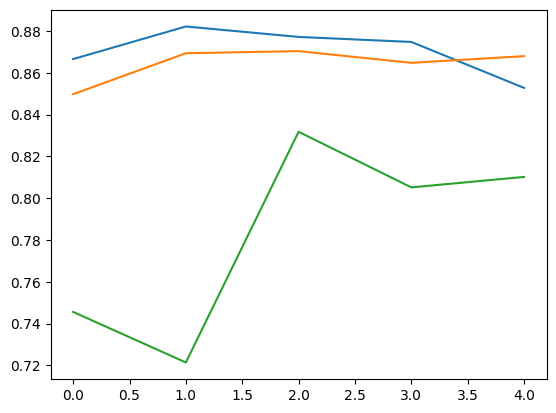

In [10]:
for model_type in model_types:
  model = create_model(model_type)
  history = model.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.2, verbose=1)
  plt.plot(history.history['val_accuracy'], label=f'{model_type} Validation Accuracy')

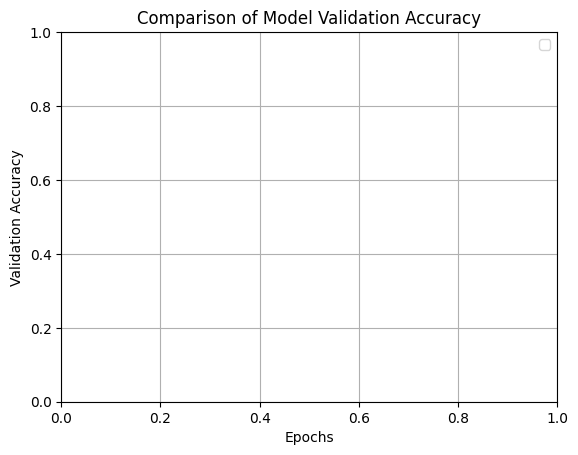

In [14]:
plt.title('Comparison of Model Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()